In [2]:
import pandas as pd
import numpy as np
from load_mg_data import load_microgrid_data
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dir = '../data/CityLearn2021-data/'
df = load_microgrid_data(dir)
df = df.iloc[0:24*365*3,:]

In [4]:
df.columns

Index(['Month', 'Hour', 'DayType', 'DaylightSavings', 'Load', 'Load_1',
       'Load_2', 'Load_3', 'Load_4', 'Load_5', 'Load_6', 'Load_7', 'Load_8',
       'Load_9', 'SolarGen', 'Price', 'Outdoor Drybulb Temperature [C]',
       'Outdoor Relative Humidity [%]', 'Diffuse Solar Radiation [W/m2]',
       'Direct Solar Radiation [W/m2]',
       '6h Prediction Outdoor Drybulb Temperature [C]',
       '12h Prediction Outdoor Drybulb Temperature [C]',
       '24h Prediction Outdoor Drybulb Temperature [C]',
       '6h Prediction Outdoor Relative Humidity [%]',
       '12h Prediction Outdoor Relative Humidity [%]',
       '24h Prediction Outdoor Relative Humidity [%]',
       '6h Prediction Diffuse Solar Radiation [W/m2]',
       '12h Prediction Diffuse Solar Radiation [W/m2]',
       '24h Prediction Diffuse Solar Radiation [W/m2]',
       '6h Prediction Direct Solar Radiation [W/m2]',
       '12h Prediction Direct Solar Radiation [W/m2]',
       '24h Prediction Direct Solar Radiation [W/m2]']

In [5]:
df['DayType']

0        Holiday
1        Holiday
2        Holiday
3        Holiday
4        Holiday
          ...   
26275        Fri
26276        Fri
26277        Fri
26278        Fri
26279        Fri
Name: DayType, Length: 26280, dtype: category
Categories (8, object): ['Fri', 'Holiday', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed']

In [6]:
day_types=['Mon','Tue','Wed','Thu','Fri','Sat','Sun','Holiday']

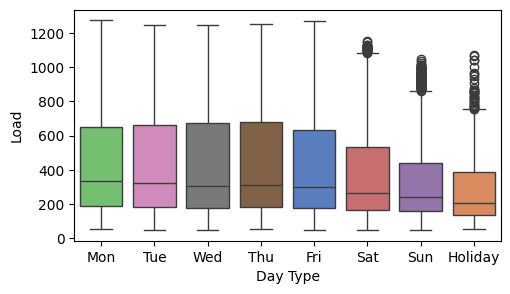

In [7]:
plt.figure(figsize=(5.5,3))
sns.boxplot(x='DayType', y='Load', hue='DayType', data=df 
            ,order=day_types
            ,palette='muted'
            )
plt.xlabel('Day Type')
#plt.title('',fontsize=12, fontweight='bold')
plt.savefig('./plots/TX_boxplot.svg', format='svg')

C:\Users\Altafloresta\AppData\Local\Temp\ipykernel_22936\2904906613.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DaylightSavings', y='Outdoor Drybulb Temperature [C]', data=df


<Axes: xlabel='DaylightSavings', ylabel='Outdoor Drybulb Temperature [C]'>

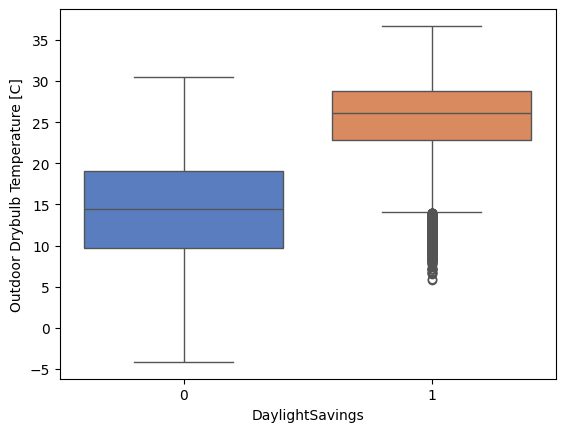

In [8]:
sns.boxplot(x='DaylightSavings', y='Outdoor Drybulb Temperature [C]', data=df 
            ,palette='muted'
            )

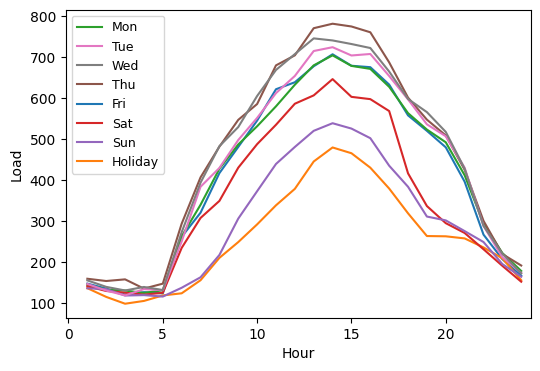

<Figure size 640x480 with 0 Axes>

In [9]:
# plt.figure(figsize=(6,4))
# for day_type in day_types:
#     df_daytype = pd.DataFrame(df[df['DayType']==day_type].groupby('Hour')['Load'].median())
#     sns.lineplot(x='Hour', y='Load', data=df_daytype,label=day_type)
    
# plt.legend(loc='upper left',fontsize=9)
# plt.xlim(xmax=24.5)
# plt.show()


plt.figure(figsize=(6,4))
sns.lineplot(x='Hour',y='Load',hue='DayType',data=df
             ,estimator=np.median
             ,errorbar=None#,palette='muted'
             )

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[labels.index(day_type)] for day_type in day_types]
           ,day_types,loc='upper left',fontsize=9)
plt.xlim(xmax=24.5)
plt.show()
plt.savefig('./plots/TX_byhour_bydaytype.svg', format='svg')

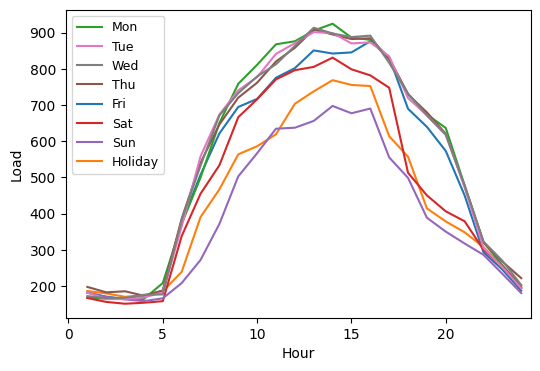

In [10]:
plt.figure(figsize=(6,4))
sns.lineplot(x='Hour',y='Load',hue='DayType',data=df.loc[df['DaylightSavings']==1,:]
             ,estimator=np.median
             ,errorbar=None#,palette='muted'
             )

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[labels.index(day_type)] for day_type in day_types]
           ,day_types,loc='upper left',fontsize=9)
plt.xlim(xmax=24.5)
plt.show()

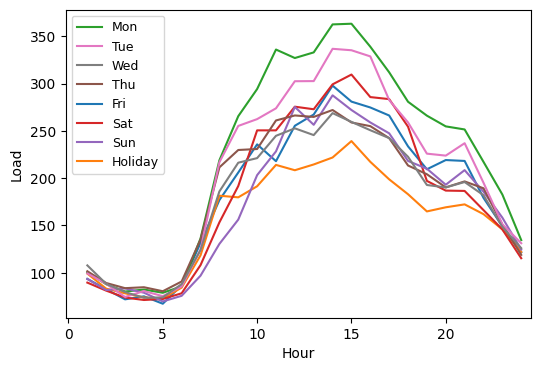

In [11]:
plt.figure(figsize=(6,4))
sns.lineplot(x='Hour',y='Load',hue='DayType',data=df.loc[df['DaylightSavings']==0,:]
             ,estimator=np.median
             ,errorbar=None#,palette='muted'
             )

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[labels.index(day_type)] for day_type in day_types]
           ,day_types,loc='upper left',fontsize=9)
plt.xlim(xmax=24.5)
plt.show()

In [1]:
df2 = df.iloc[1450:2000,:]

NameError: name 'df' is not defined

In [32]:
df2

,Month,Hour,DayType,DaylightSavings,Load,Load_1,Load_2,Load_3,Load_4,Load_5,...,24h Prediction Outdoor Drybulb Temperature [C],6h Prediction Outdoor Relative Humidity [%],12h Prediction Outdoor Relative Humidity [%],24h Prediction Outdoor Relative Humidity [%],6h Prediction Diffuse Solar Radiation [W/m2],12h Prediction Diffuse Solar Radiation [W/m2],24h Prediction Diffuse Solar Radiation [W/m2],6h Prediction Direct Solar Radiation [W/m2],12h Prediction Direct Solar Radiation [W/m2],24h Prediction Direct Solar Radiation [W/m2]
1400,2,9,Fri,0,208.24,64.36,14.56,7.35,1.45,27.46,...,18.64,55.93,69.49,83.63,87.79,0.00,22.51,943.92,0.00,1096.84
1401,2,10,Fri,0,210.85,54.90,12.61,11.17,5.37,23.82,...,20.41,57.77,70.82,76.75,109.92,0.00,31.93,684.13,0.00,1167.64
1402,2,11,Fri,0,210.34,57.46,14.37,13.24,8.06,29.93,...,22.92,60.66,72.69,65.93,91.30,0.00,42.36,372.89,0.00,1294.46
1403,2,12,Fri,0,245.33,74.76,27.32,13.51,8.06,25.52,...,22.50,62.65,74.06,70.35,27.98,0.00,39.40,77.47,0.00,1122.62
1404,2,13,Fri,0,288.75,82.64,20.65,13.48,8.06,31.77,...,24.34,66.32,72.88,60.44,0.00,0.00,45.30,0.00,0.00,1235.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,3,20,Sun,1,247.85,11.24,22.88,2.04,2.35,39.03,...,6.58,73.05,74.60,77.84,0.00,122.57,0.00,0.00,210.54,0.00
1796,3,21,Sun,1,226.31,10.07,21.66,1.77,2.35,44.30,...,7.98,71.59,73.37,69.75,0.00,202.45,0.00,0.00,311.76,0.00
1797,3,22,Sun,1,182.77,9.12,13.93,1.77,2.35,39.16,...,6.26,70.71,71.75,76.94,0.00,244.07,0.00,0.00,406.26,0.00
1798,3,23,Sun,1,145.62,8.03,3.24,1.77,1.45,24.70,...,6.42,72.88,70.12,75.10,0.00,285.76,0.00,0.00,428.94,0.00


<Axes: >

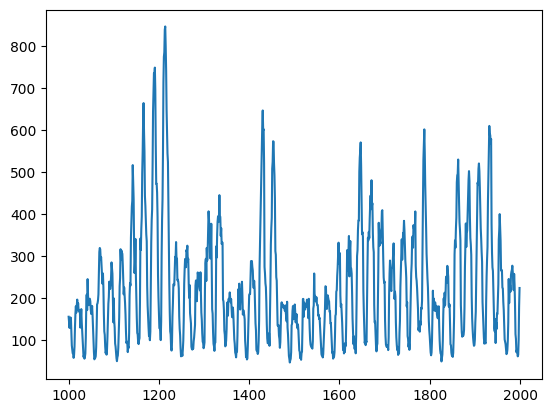

In [35]:
df2['Load'].plot()

<Axes: >

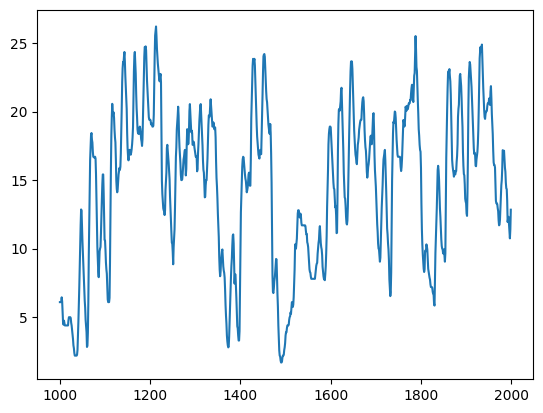

In [39]:
df2['Outdoor Drybulb Temperature [C]'].plot()

In [48]:
sns.scatterplot(x='Outdoor Drybulb Temperature [C]',y='Load',hue='DaylightSavings',data=df.groupby('Month'))

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.groupby.generic.DataFrameGroupBy'>.

In [30]:
df2.loc[(df['DaylightSavings']==0) & (df['DayType']=='Tue') & (df['Hour']==7),'Load'].mean()

136.05

In [31]:
df2.loc[(df['DaylightSavings']==1) & (df['DayType']=='Tue') & (df['Hour']==7),'Load'].mean()

271.02

<Axes: >

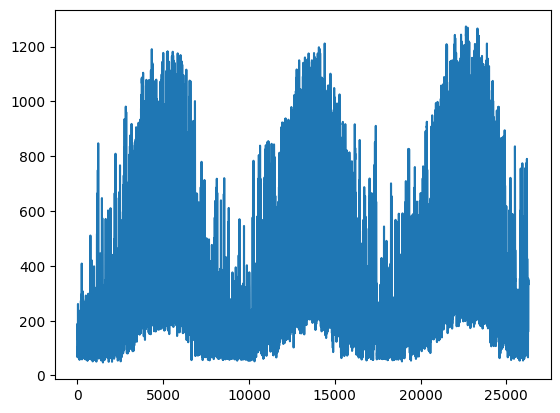

In [44]:
df['Load'].plot()